# Fake-Faces Inference Demo Notebook

Below is a demonstration of how to use the fake-faces package from Python code to predict whether an image is real or fake.

In [1]:
import os
import sys
from IPython import get_ipython
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import dlib
from fake_faces.predicting import predict_image

sys.path.append("../pixel2style2pixel/")
from pixel2style2pixel.scripts import align_all_parallel as align


# Align the input image

First we will need to crop the input image to center the face and align the eyes, nose, mouth etc.

Before:

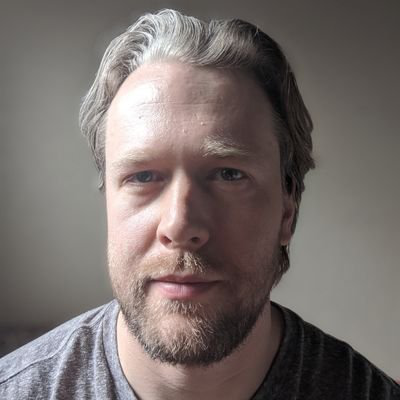

In [2]:
im = load_img("images/alex.jpg")  # the author's mugshot
im

After:

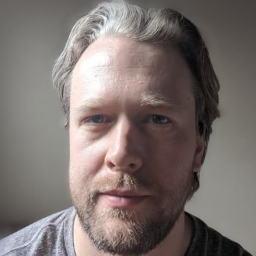

In [3]:
predictor = dlib.shape_predictor("../shape_predictor_68_face_landmarks.dat")
im1 = align.align_face("images/alex.jpg", predictor)
os.makedirs("images/aligned", exist_ok=True)
im1.save("images/aligned/alex.jpg")
im1

## Falsify the image

Now we need a "fake" version of this image, so let's call pixel2style2pixel to autoencode it.

In [5]:
!fake-faces falsify ../psp_ffhq_encode.pt ./images/aligned ./images/fake

2020-12-15 22:08:44.316967: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-12-15 22:08:45.015671: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-12-15 22:08:45.035623: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-15 22:08:45.035974: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:09:00.0 name: GeForce RTX 2060 SUPER computeCapability: 7.5
coreClock: 1.71GHz coreCount: 34 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2020-12-15 22:08:45.035986: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-12-15 22:08:45.036787: I tensorflow/stream_executor/pla

2020-12-15 22:08:45.964707: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2020-12-15 22:08:45.964745: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2020-12-15 22:08:45.964986: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2020-12-15 22:08:45.965033: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2020-12-15 22:08:45.965350: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2020-12-15 22:08:45.965394: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2020-12-15 22:08:45.966049: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2020-12-15 22:08:45.966090: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1513] CUPTI activity buffer flushed
2020-12-15 22:08:45.966311: I tensorflow/core/profiler/lib/profiler_session.cc:1

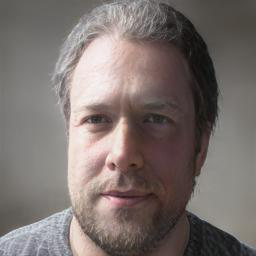

In [6]:
im2 = load_img("images/fake/inference_results/alex.jpg")
im2

## Load the model

In [7]:
model = load_model("../best-model-rgb.18-0.05-0.98.hdf5")

## Predict on the real image:

In [9]:
def interpret(prediction):
    if prediction >= 0.5:
        result = "REAL"
        conf = prediction * 100
    else:
        result = "FAKE"
        conf = (1 - prediction) * 100
    return (result, conf)

prediction1 = predict_image(model, "images/aligned/alex.jpg", color_mode="rgb")
result1, conf1 = interpret(prediction1)
print(f"This image is {result1} with {conf1}% confidence")

This image is REAL with 94.95937824249268% confidence


## Predict on the fake image

In [12]:
prediction2 = predict_image(
    model, "images/fake/inference_results/alex.jpg", color_mode="rgb"
)
result2, conf2 = interpret(prediction2)
print(f"This image is {result2} with {conf2}% confidence")

This image is FAKE with 99.99999999607309% confidence
